In [275]:
import pandas as pd

In [276]:
df = pd.read_csv('../ml-latest-small/movies.csv')
df_notas = pd.read_csv('../ml-latest-small/ratings.csv')

In [277]:
df_notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [278]:
total_score = df_notas['movieId'].value_counts()
total_score = total_score.reset_index()
total_score.columns = ['movieId', 'vote_count']

In [279]:
df = df.merge(total_score, 'inner', 'movieId')

In [280]:
df.sort_values('vote_count', ascending=False)

,movieId,title,genres,vote_count
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278
...,...,...,...,...
3053,4093,Cop (1988),Thriller,1
3049,4089,Born in East L.A. (1987),Comedy,1
6687,58351,City of Men (Cidade dos Homens) (2007),Drama,1
3045,4083,Best Seller (1987),Thriller,1


In [281]:
df_notas.groupby('movieId').mean().reset_index()[['rating', 'movieId']]

,rating,movieId
0,3.920930,1
1,3.431818,2
2,3.259615,3
3,2.357143,4
4,3.071429,5
...,...,...
9719,4.000000,193581
9720,3.500000,193583
9721,3.500000,193585
9722,3.500000,193587


# Primeira abordagem: 
Recomendar pela contagem de votos (filmes populares)

In [282]:
df['mean_rating'] = df_notas.groupby('movieId').mean().reset_index()['rating']

In [283]:
df.sort_values('vote_count', ascending=False).head(10)

,movieId,title,genres,vote_count,mean_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
97,110,Braveheart (1995),Action|Drama|War,237,4.031646
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
461,527,Schindler's List (1993),Drama|War,220,4.225000


# Segunda abordagem: 
**Recomendar pela média de votos (filmes com mais de 50 avaliações)**

In [284]:
df.query('vote_count >= 50').sort_values('mean_rating', ascending=False)

,movieId,title,genres,vote_count,mean_rating
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
974,1276,Cool Hand Luke (1967),Drama,57,4.271930
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041
...,...,...,...,...,...
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355
376,432,City Slickers II: The Legend of Curly's Gold (...,Adventure|Comedy|Western,55,2.645455
379,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635


# Terceira abordagem:
Recomendação por gênero:

In [285]:
assisti = [1,21,19,10,11,7,2]

In [286]:
df.loc[assisti]

,movieId,title,genres,vote_count,mean_rating
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,36,3.222222
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,15,2.500000
10,11,"American President, The (1995)",Comedy|Drama|Romance,70,3.671429
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror,19,2.421053
7,8,Tom and Huck (1995),Adventure|Children,8,2.875000
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615


In [287]:
aventura_infantil_fantasia = df.query('genres == "Adventure|Children|Fantasy"').sort_values('mean_rating', ascending=False)

In [288]:
aventura_infantil_fantasia.drop(assisti, errors='ignore')

,movieId,title,genres,vote_count,mean_rating
8701,126142,The Cave of the Golden Rose (1991),Adventure|Children|Fantasy,1,4.000000
7409,80748,Alice in Wonderland (1933),Adventure|Children|Fantasy,1,4.000000
6638,56915,"Water Horse: Legend of the Deep, The (2007)",Adventure|Children|Fantasy,1,4.000000
7461,82169,Chronicles of Narnia: The Voyage of the Dawn T...,Adventure|Children|Fantasy,7,3.857143
3569,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107,3.761682
1616,2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,43,3.581395
6734,59501,"Chronicles of Narnia: Prince Caspian, The (2008)",Adventure|Children|Fantasy,12,3.541667
6058,41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62,3.443548
53,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy,34,3.235294
6612,56171,"Golden Compass, The (2007)",Adventure|Children|Fantasy,18,3.111111


# Procura de usuários similares

**Notas em um mesmo filme:**
- João: 4
- Maria: 5
- Paulo: 3
- Joana: 3.5
<br><br>
$Distância = x-y$

**No caso de 2 filmes**

João = [4, 4.5]
Maria = [5, 5]

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
sns.set_style('darkgrid')

Text(0.5, 1.0, 'Distância entre João e maria')

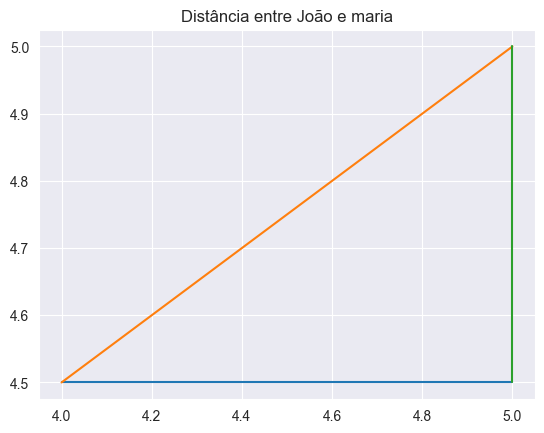

In [291]:
plt.plot([4, 5], [4.5, 4.5], linestyle="-")
plt.plot([4, 5], [4.5, 5], linestyle="-")
plt.plot([5, 5], [5, 4.5], linestyle="-")
plt.title('Distância entre João e maria')

In [292]:
import numpy as np
from math import sqrt

In [293]:
joao = np.array([4,4.5])
joaquina  =np.array([3.5,4.5])
maria  =np.array([5,5])

In [294]:
def pitagoras(a,b):
    delta_x, delta_y = a - b
    delta_x, delta_y = delta_x ** 2, delta_y ** 2
    return sqrt(delta_x + delta_y)

In [295]:
pitagoras(joao, maria)

1.118033988749895

In [296]:
np.linalg.norm(joao - maria)

1.118033988749895

In [297]:
np.linalg.norm(joao - joaquina)

0.5

In [298]:
df_notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [299]:
df_notas.query('userId == 1')[['movieId', 'rating']]

,movieId,rating
0,1,4.0
1,3,4.0
2,6,4.0
3,47,5.0
4,50,5.0
...,...,...
227,3744,4.0
228,3793,5.0
229,3809,4.0
230,4006,4.0


In [300]:
df_notas.set_index('movieId')

,userId,rating,timestamp
movieId,,,
1,1,4.0,964982703
3,1,4.0,964981247
6,1,4.0,964982224
47,1,5.0,964983815
50,1,5.0,964982931
...,...,...,...
166534,610,4.0,1493848402
168248,610,5.0,1493850091
168250,610,5.0,1494273047


In [301]:
def notas_usuario(usuario):
    notas_usuario = df_notas.query("userId == %d" % usuario)
    notas_usuario = notas_usuario[['movieId', 'rating']].set_index("movieId")
    return notas_usuario

In [302]:
user4 = notas_usuario(4)
user1 = notas_usuario(1)

In [303]:
diferencas =  user4.join(user1, lsuffix='_left', rsuffix='_right', how = 'inner')

In [304]:
diferencas.head()

,rating_left,rating_right
movieId,,
47,2.0,5.0
235,2.0,4.0
260,5.0,5.0
296,1.0,3.0
441,1.0,4.0


In [305]:
diferencas['distancia'] = np.linalg.norm(diferencas['rating_left'] -  diferencas['rating_right'])

In [306]:
diferencas

,rating_left,rating_right,distancia
movieId,,,
47,2.0,5.0,11.135529
235,2.0,4.0,11.135529
260,5.0,5.0,11.135529
296,1.0,3.0,11.135529
441,1.0,4.0,11.135529
457,5.0,5.0,11.135529
553,2.0,5.0,11.135529
593,5.0,4.0,11.135529
608,5.0,5.0,11.135529


In [307]:
def distancia_usuarios(user_x, user_y):
    user_x = notas_usuario(user_x)
    user_y = notas_usuario(user_y)
    diferencas = user_x.join(user_y, lsuffix='_l', rsuffix='_r', how = 'inner')
    diferencas['distancia'] = np.linalg.norm(diferencas['rating_l'] -  diferencas['rating_r'])
    return sqrt(diferencas['distancia'].sum())

In [308]:
distancia_usuarios(10, 11)

2.0597671439071177

# Distância entre usuários de um dataset

In [309]:
def distancia_usuarios(id_x, id_y):
    user_x = notas_usuario(id_x)
    user_y = notas_usuario(id_y)
    diferencas = user_x.join(user_y, lsuffix='_l', rsuffix='_r', how = 'inner')
    diferencas['distancia'] = np.linalg.norm(diferencas['rating_l'] -  diferencas['rating_r'])
    return [id_x, id_y, sqrt(diferencas['distancia'].sum())]

In [310]:
distancia_usuarios(10, 11)

[10, 11, 2.0597671439071177]

In [311]:
quantidade_users = len(df_notas.userId.unique())
print(f'Quantidade de usuários: {quantidade_users}')

Quantidade de usuários: 610


In [312]:
voce_id = 1

def distancia_de_todos(id, minimo):
    distancias = [distancia_usuarios(i, id, minimo) for i in df_notas.userId.unique()]
        
    return pd.DataFrame(distancias, columns=['voce', 'outro_user', 'distancia'])

In [316]:
def notas_usuario(usuario):
    notas_usuario = df_notas.query("userId == %d" % usuario)
    notas_usuario = notas_usuario[['movieId', 'rating']].set_index("movieId")
    return notas_usuario

def distancia_usuarios(id_x, id_y, minimo):
    user_x = notas_usuario(id_x)
    user_y = notas_usuario(id_y)
    diferencas = user_x.join(user_y, lsuffix='_l', rsuffix='_r', how = 'inner')
    
    
    if(len(diferencas) < minimo):
        return [id_x, id_y, 1_000_000]

    else: 
        diferencas = sqrt(np.linalg.norm(diferencas['rating_l'] - diferencas['rating_r']).sum())
        return [id_x, id_y, diferencas]

In [317]:
distancia_de_todos(5,5)

,voce,outro_user,distancia
0,1,5,1.934336
1,2,5,1000000.000000
2,3,5,1000000.000000
3,4,5,2.514867
4,5,5,0.000000
...,...,...,...
605,606,5,2.295175
606,607,5,2.165737
607,608,5,2.788938
608,609,5,1.565085


In [318]:
notas_usuario(4).join(notas_usuario(5), lsuffix='_1', rsuffix='_5').dropna()

,rating_1,rating_5
movieId,,
21,3.0,4.0
58,3.0,5.0
232,5.0,4.0
247,3.0,5.0
265,5.0,3.0
296,1.0,5.0
357,3.0,2.0
457,5.0,4.0
475,5.0,5.0


In [319]:
def notas_usuario(usuario):
    notas_usuario = df_notas.query("userId == %d" % usuario)
    notas_usuario = notas_usuario[['movieId', 'rating']].set_index("movieId")
    return notas_usuario

def distancia_usuarios(id_x, id_y, minimo):
    user_x = notas_usuario(id_x)
    user_y = notas_usuario(id_y)
    diferencas = user_x.join(user_y, lsuffix='_l', rsuffix='_r', how = 'inner')
    
    
    if(len(diferencas) < minimo):
        return [id_x, id_y, 1_000_000]

    else: 
        diferencas = sqrt(np.linalg.norm(diferencas['rating_l'] - diferencas['rating_r']).sum())
        return [id_x, id_y, diferencas]

In [320]:
distancia_usuarios(4,5, 5)

[4, 5, 2.514866859365871]

In [327]:
voce_id = 1

def distancia_de_todos(id, minimo, n =None):
    todos_users = df_notas.userId.unique()
    if n:
        todos_users = todos_users[:n]
    distancias = [distancia_usuarios(i, id, minimo) for i in todos_users]
        
    return pd.DataFrame(distancias, columns=['outro_user', 'voce', 'distancia'])

In [328]:
def mais_proximo_de(id, minimo, n = None):
    if n: 
        distancias = distancia_de_todos(id, minimo=5, n=n)
    else:
        distancias = distancia_de_todos(id, minimo=5)
    
    distancias = distancias.sort_values("distancia").reset_index(drop=True).drop(0)
    distancias = distancias.drop(index = distancias.loc[distancias['distancia'] == 1_000_000].index, errors='ignore')
    return distancias

In [329]:
mais_proximo_de(4, 5, 50).drop(assisti, errors='ignore').sort_values('distancia', ascending=True)

,outro_user,voce,distancia
3,35,4,2.059767
4,30,4,2.140695
5,11,4,2.140695
6,22,4,2.195866
8,15,4,2.236068
9,43,4,2.279507
12,38,4,2.378414
13,10,4,2.396782
14,34,4,2.414736
15,47,4,2.414736


In [347]:
def sugere_para(id, n=None):
    notas_de_voce = notas_usuario(id)
    filmes_assistidos = notas_de_voce.index

    similares = mais_proximo_de(id,5, n)
    similar = similares.iloc[0].name
    notas_do_similar = notas_usuario(similar)
    
    notas_do_similar = notas_do_similar.drop(filmes_assistidos, errors='ignore')
    recomendacoes = notas_do_similar.sort_values('rating', ascending=False)
    return recomendacoes.reset_index().merge(df, on ='movieId', how='inner')

In [348]:
sugere_para(5, 50)

,movieId,rating,title,genres,vote_count,mean_rating
0,2033,5.0,"Black Cauldron, The (1985)",Adventure|Animation|Children|Fantasy,8,3.750000
1,2115,5.0,Indiana Jones and the Temple of Doom (1984),Action|Adventure|Fantasy,108,3.638889
2,2137,5.0,Charlotte's Web (1973),Animation|Children,21,3.547619
3,2139,5.0,"Secret of NIMH, The (1982)",Adventure|Animation|Children|Drama,21,3.476190
4,2141,5.0,"American Tail, An (1986)",Adventure|Animation|Children|Comedy,18,3.166667
...,...,...,...,...,...,...
214,2253,2.0,Toys (1992),Comedy|Fantasy,20,2.375000
215,2338,2.0,I Still Know What You Did Last Summer (1998),Horror|Mystery|Thriller,18,2.055556
216,1219,2.0,Psycho (1960),Crime|Horror,83,4.036145
217,2617,2.0,"Mummy, The (1999)",Action|Adventure|Comedy|Fantasy|Horror|Thriller,87,3.120690


# Sugerindo com base em vários usuários

In [355]:
def sugere_para(id,n_mais_proximo ,n=None ):
    notas_de_voce = notas_usuario(id)
    filmes_assistidos = notas_de_voce.index

    similares = mais_proximo_de(id,5, n)
    similar = similares.iloc[0].name
    notas_do_similar = notas_usuario(similar)
    
    notas_do_similar = notas_do_similar.drop(filmes_assistidos, errors='ignore')
    recomendacoes = notas_do_similar.sort_values('rating', ascending=False)
    recomendacoes = recomendacoes[:n_mais_proximo]
    return recomendacoes.reset_index().merge(df, on ='movieId', how='inner').sort_values('rating', ascending=False)

In [358]:
sugere_para(2, 10, 50)

,movieId,rating,title,genres,vote_count,mean_rating
0,5060,5.0,M*A*S*H (a.k.a. MASH) (1970),Comedy|Drama|War,46,3.934783
1,2858,5.0,American Beauty (1999),Drama|Romance,204,4.056373
2,1291,5.0,Indiana Jones and the Last Crusade (1989),Action|Adventure,140,4.046429
3,1298,5.0,Pink Floyd: The Wall (1982),Drama|Musical,23,3.760870
4,2947,5.0,Goldfinger (1964),Action|Adventure|Thriller,53,3.839623
5,2944,5.0,"Dirty Dozen, The (1967)",Action|Drama|War,32,3.968750
6,2899,5.0,Gulliver's Travels (1939),Adventure|Animation|Children,3,3.000000
7,2872,5.0,Excalibur (1981),Adventure|Fantasy,25,3.640000
8,1517,5.0,Austin Powers: International Man of Mystery (1...,Action|Adventure|Comedy,100,3.535000
9,1198,5.0,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,200,4.207500


In [362]:
similares = mais_proximo_de(5,5, 10)
similar = similares.iloc[0].name
similares

,outro_user,voce,distancia
1,7,5,1.831421
2,1,5,1.934336
3,8,5,2.482824
4,4,5,2.514867
5,6,5,2.892508


In [363]:
df_notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [365]:
notas_dos_similares = df_notas.set_index('userId').loc[similares['outro_user']]

In [376]:
notas_dos_similares.groupby('movieId').mean()[['rating']].merge(df, on ='movieId', how='inner').sort_values('mean_rating', ascending=False)[:10]

,movieId,rating,title,genres,vote_count,mean_rating
647,3851,5.0,I'm the One That I Want (2000),Comedy,1,5.000000
457,1733,5.0,Afterglow (1997),Drama|Romance,4,4.500000
676,4273,4.0,Under the Sand (2000),Drama,2,4.500000
369,1046,5.0,Beautiful Thing (1996),Drama|Romance,4,4.500000
161,318,5.0,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
476,1927,5.0,All Quiet on the Western Front (1930),Action|Drama|War,10,4.350000
687,4765,5.0,L.I.E. (2001),Drama,3,4.333333
335,898,5.0,"Philadelphia Story, The (1940)",Comedy|Drama|Romance,29,4.310345
81,176,5.0,Living in Oblivion (1995),Comedy,13,4.307692
232,475,4.5,In the Name of the Father (1993),Drama,25,4.300000
